# Investigating SuperMarket Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

SuperMarkets data has enormous potential to drive  businesses to success. Actionable insights can be drawn for Managers and owners to work on and capture the market!
### contain:
* Total Rows = 1000
* Total Columns = 17
#### Questions:
+ Where is the city that has more Supermarkets customers ?
+ what is the Total price of SuperMarkets Orders per each city  ? 
+ what is the Total price per Gender ?
+ What is the Gross Income of each Customer order at Supermarket  per each month ?
+ What is The Average Customer stratification rating on their overall shopping for each city ?
+ What is the Dominant Gender ordering for each Porduct line ?
+ What is the Gross income for each Product line ?
+ What is the Rating for each Product line ?
+ What is correlation relation between the Data ?

<a id='wrangling'></a>
## Data wrangling



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
from plotly.offline import iplot
from plotly.graph_objs import Scatter
import cufflinks as cf
py.init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.shape

(1000, 17)

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


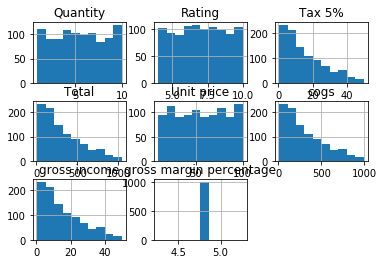

In [5]:
df.hist();

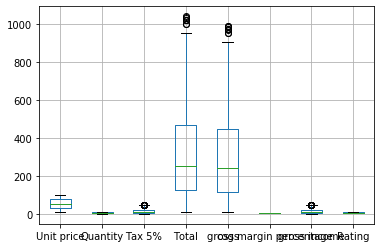

In [6]:
df.boxplot()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df['gross margin percentage'].unique()

array([4.76190476])

In [10]:
# since gross margin percentage column has only one value so we will drop it
df.drop(['gross margin percentage'],axis = 1, inplace = True)
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross income', 'Rating'],
      dtype='object')

In [11]:
#converting Date to Datetime 
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

#### Observation from dataset
+ The Dataset has no Duplicates or missing Data
+ Date column is string not DateTime
+ gross margin percentage has invalid values as it has one value only
+ Total,Cost of goods sold(cogs) are Right skewed

<a id='eda'></a>
## Exploratory Data Analysis

1. __Where is the city that has more Supermarkets customers ?__

In [12]:
place_df = pd.DataFrame(df['City'].value_counts())
place_df
values = place_df['City']
names = place_df.index
 
fig = px.pie(values=values, names=names,title = "customers per city")
fig.show()

2. __what is the Total price of SuperMarkets Orders per each city ?__ 

In [13]:
cit_total_price = df.groupby('City')['Total'].sum().reset_index(name = "total_price")
cit_total_price

,City,total_price
0,Mandalay,106197.6720
1,Naypyitaw,110568.7065
2,Yangon,106200.3705


In [14]:
values = cit_total_price['total_price']
names = cit_total_price['City']
 
fig = px.pie(values=values, names=names,title = "Total price per city")
fig.show()

3. __what is the Total price per Gender ?__

In [15]:
total_price_per_gender = df.groupby('Gender')['Total'].sum().reset_index(name = "total_price")
total_price_per_gender

,Gender,total_price
0,Female,167882.925
1,Male,155083.824


In [16]:
values = total_price_per_gender['total_price']
names = total_price_per_gender['Gender']

fig = px.pie(values=values, names=names,title = "Total price per Gender ")
fig.show()

4. __What is the Gross Income of each Customer order at Supermarket  per each month ?__

In [17]:
#print(df['Date'].year)
df['Date'].astype('datetime64')
# df['year'] = df['Date'].dt.year
# df['month'] = df['Date'].apply(lambda x :x.month)
df['month'] = df['Date'].dt.month_name(locale='English')
date_total = df[['Date','gross income']]
date_total.iplot(kind = 'bar',x = 'Date' , y = 'gross income',title ='gross income ',xTitle = 'months of year 2019',yTitle = 'gross income' )

5. __What is The Average Customer stratification rating on their overall shopping for each city ?__

In [18]:
city_average_rating = df.groupby('City')['Rating'].mean().reset_index(name = "Average_rating")
values = city_average_rating['Average_rating']
names = city_average_rating['City']

fig = px.pie(values=values, names=names,title = "Average Customer stratification rating on their overall shopping for each city ")
fig.show()


6. __What is the Dominant Gender ordering for each Porduct line ?__

In [19]:
product_line_quantity = df.groupby(['Product line','Gender'])['Quantity'].sum().reset_index(name = "Quantity")
product_line_quantity
fig = px.bar(product_line_quantity, x="Product line", y="Quantity", color="Gender", title="Product line Quantity per gender")
fig.show()

7. __What is the Gross income for each Product line ?__

In [20]:
# product_line_gross_income = df.groupby('Product line')['gross income'].sum()
product_line_gross_income = df.groupby('Product line').agg({'gross income' : np.sum}).reset_index()
fig = px.bar(product_line_gross_income , x = "Product line" ,y ="gross income",title = "Gross income for each product line")

fig.show()

8. __What is the Rating for each Product line ?__

In [21]:
Product_line_average_rating = df.groupby('Product line')['Rating'].mean().reset_index(name = "Average_rating")


fig = px.bar(Product_line_average_rating,x = 'Product line', y = 'Average_rating' , title = "Average Customer stratification rating on their overall shopping for each Product line ")

fig.show()


9. __What is correlation relation between the Data ?__

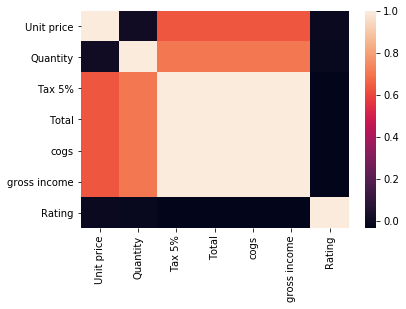

In [23]:
sns.heatmap(df.corr())

<a id='conclusions'></a>
## Conclusions


+ Yangon has the highest number of Supermarket Customers
+ Naypyitaw has the highest Total orders price by 110,568
+ Females(Women) are the most Buying as they have Total price higher than Males(Men)
+ March has the Highest Gross Income of each Customer order at Supermarkets 
+ The three Cities have nearly same Average Customer stratification rating on their overall shopping
+ Men's highest product line orders is health and beauty products  
+ While Women's highest product line orders is Fashion accessories products 
+ The highest Gross income product line is Food and beverages
+ Total price,Gross Income are correlated to Quantity and Unit price